In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import simtk.openmm as mm
from msmbuilder.decomposition import tICA, PCA

In [3]:
dataFull = np.loadtxt('COLVAR_ala4_1Dcv_AtoD_5us')

In [4]:
data = dataFull[:,1:7]
sumabs=dataFull[:,-1]


In [5]:
print(data)
print(sumabs)

[[-2.04987  2.44583 -1.27433 -0.20764 -1.30052 -0.61203]
 [-2.11034  2.44198 -1.29206 -0.13455 -1.25049 -0.22291]
 [-2.66172  2.83348 -1.58355  0.09288 -1.25534 -0.37196]
 ...
 [-1.31757 -0.04466 -2.14892  0.69352 -0.88916  2.67705]
 [-1.17834  0.07228 -1.12522 -0.53429 -0.94259  2.66362]
 [-0.89706 -0.70835 -1.18741 -0.10846 -2.35776 -0.47046]]
[0.2574  0.27747 0.30722 ... 0.37951 0.41214 0.35754]


In [6]:
sincos=[]

for i in range(0,len(data)):
    temp=[]
    for j in range(0,6):
        temp.append(np.sin(data[i,j]))
        temp.append(np.cos(data[i,j]))
    sincos.append(temp)

diheds_sincos=np.array(sincos)

In [ ]:
fe = np.loadtxt('clusterData_5us/fe_5us')
print(fe)

In [7]:
X = sumabs[:10000]
X_dihed = diheds_sincos[:10000]
y = fe[:10000]

xnew_sincos=[]
xnew=[]
ynew=[]
for i in range(0,10000):
    t1=[]
    t1.append(X[i])
    xnew.append(t1)
    t2=[]
    t2.append(y[i])
    ynew.append(t2)
    t3=[]
    for j in range(0,12):
        t3.append(X_dihed[i][j])
    xnew_sincos.append(t3)

xnew=np.array(xnew)
ynew=np.array(ynew)
xnew_sincos=np.array(xnew_sincos)

print(xnew_sincos[1])

NameError: name 'fe' is not defined

In [120]:
def nonlin(x, deriv=False):
  if(deriv==True):
     return (x*(1-x))
  return 1/(1+np.exp(-x))

In [121]:
syn0 = 2*np.random.random((12,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

In [122]:
#training step
for j in range(50000):  
    
    l0 = xnew_sincos
    l1 = nonlin(np.dot(l0, syn0))
    l2 = nonlin(np.dot(l1, syn1))
    
    l2_error = ynew - l2
    if(j % 10000) == 0: 
        print("Error: " + str(np.mean(np.abs(l2_error))))
        
    l2_delta = l2_error*nonlin(l2, deriv=True)
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error * nonlin(l1,deriv=True)
    
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
print("This is the output when the training is finished")
print(l2)

Error: 0.49013689128537036
Error: 0.6979640336664
Error: 0.6979640336664
Error: 0.6979640336664
Error: 0.6979640336664
This is the output when the training is finished
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [196]:
import sklearn
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xnew_sincos, ynew, test_size=0.2, random_state=42)
batch_size =len(X_train)

print(X_train.shape, y_train.shape,y_test.shape )

(8000, 12) (8000, 1) (2000, 1)


In [197]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.1.0


In [198]:
# Import the kera modules
from keras.layers import Input, Dense
from keras.models import Model
 
# This returns a tensor. Since the input only has one column
inputs = Input(shape=(12,))
 
# a layer instance is callable on a tensor, and returns a tensor
# To the first layer we are feeding inputs
x = Dense(6, activation='relu')(inputs)
# To the next layer we are feeding the result of previous call here it is h
x = Dense(3, activation='relu')(x)
#x = Dense(3, activation='relu')(x)
 
# Predictions are the result of the neural network. Notice that the predictions are also having one column.
predictions = Dense(1)(x)
 
# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
# Here the loss function is mse - Mean Squared Error because it is a regression problem.
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mse'])

In [199]:
model.fit(X_train, y_train,  epochs=500, batch_size=100)  # starts training

Epoch 1/500
8000/8000 [==============================] - 0s 21us/step - loss: 0.9382 - mse: 0.9382
Epoch 2/500
8000/8000 [==============================] - 0s 10us/step - loss: 0.7328 - mse: 0.7328
Epoch 3/500
8000/8000 [==============================] - 0s 10us/step - loss: 0.6798 - mse: 0.6798
Epoch 4/500
8000/8000 [==============================] - 0s 10us/step - loss: 0.6480 - mse: 0.6480
Epoch 5/500
8000/8000 [==============================] - 0s 11us/step - loss: 0.6213 - mse: 0.6213
Epoch 6/500
8000/8000 [==============================] - 0s 11us/step - loss: 0.5961 - mse: 0.5961
Epoch 7/500
8000/8000 [==============================] - 0s 12us/step - loss: 0.5746 - mse: 0.5746
Epoch 8/500
8000/8000 [==============================] - 0s 12us/step - loss: 0.5554 - mse: 0.5554
Epoch 9/500
8000/8000 [==============================] - 0s 11us/step - loss: 0.5369 - mse: 0.5369
Epoch 10/500
8000/8000 [==============================] - 0s 9us/step - loss: 0.5197 - mse: 0.5197
Epoch 11/5

8000/8000 [==============================] - 0s 11us/step - loss: 0.2217 - mse: 0.2217
Epoch 84/500
8000/8000 [==============================] - 0s 10us/step - loss: 0.2195 - mse: 0.2195
Epoch 85/500
8000/8000 [==============================] - 0s 10us/step - loss: 0.2170 - mse: 0.2170
Epoch 86/500
8000/8000 [==============================] - 0s 10us/step - loss: 0.2155 - mse: 0.2155
Epoch 87/500
8000/8000 [==============================] - 0s 10us/step - loss: 0.2138 - mse: 0.2138
Epoch 88/500
8000/8000 [==============================] - 0s 10us/step - loss: 0.2117 - mse: 0.2117
Epoch 89/500
8000/8000 [==============================] - 0s 10us/step - loss: 0.2103 - mse: 0.2103
Epoch 90/500
8000/8000 [==============================] - 0s 10us/step - loss: 0.2080 - mse: 0.2080
Epoch 91/500
8000/8000 [==============================] - 0s 10us/step - loss: 0.2065 - mse: 0.2065
Epoch 92/500
8000/8000 [==============================] - 0s 9us/step - loss: 0.2047 - mse: 0.2047
Epoch 93/500
8

8000/8000 [==============================] - 0s 10us/step - loss: 0.0260 - mse: 0.0260
Epoch 246/500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0261 - mse: 0.0261
Epoch 247/500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0258 - mse: 0.0258
Epoch 248/500
8000/8000 [==============================] - 0s 10us/step - loss: 0.0260 - mse: 0.0260
Epoch 249/500
8000/8000 [==============================] - 0s 10us/step - loss: 0.0261 - mse: 0.0261
Epoch 250/500
8000/8000 [==============================] - 0s 10us/step - loss: 0.0258 - mse: 0.0258
Epoch 251/500
8000/8000 [==============================] - 0s 11us/step - loss: 0.0259 - mse: 0.0259
Epoch 252/500
8000/8000 [==============================] - 0s 11us/step - loss: 0.0255 - mse: 0.0255
Epoch 253/500
8000/8000 [==============================] - 0s 10us/step - loss: 0.0257 - mse: 0.0257
Epoch 254/500
8000/8000 [==============================] - 0s 10us/step - loss: 0.0255 - mse: 0.0255
Epoch 

8000/8000 [==============================] - 0s 9us/step - loss: 0.0199 - mse: 0.0199
Epoch 408/500
8000/8000 [==============================] - 0s 11us/step - loss: 0.0196 - mse: 0.0196
Epoch 409/500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0197 - mse: 0.0197
Epoch 410/500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0196 - mse: 0.0196
Epoch 411/500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0196 - mse: 0.0196
Epoch 412/500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0197 - mse: 0.0197
Epoch 413/500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0195 - mse: 0.0195
Epoch 414/500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0196 - mse: 0.0196
Epoch 415/500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0195 - mse: 0.0195
Epoch 416/500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0196 - mse: 0.0196
Epoch 417/500

Epoch 489/500
8000/8000 [==============================] - 0s 10us/step - loss: 0.0184 - mse: 0.0184
Epoch 490/500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0183 - mse: 0.0183
Epoch 491/500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0181 - mse: 0.0181
Epoch 492/500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0185 - mse: 0.0185
Epoch 493/500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0182 - mse: 0.0182
Epoch 494/500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0183 - mse: 0.0183
Epoch 495/500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0184 - mse: 0.0184
Epoch 496/500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0182 - mse: 0.0182
Epoch 497/500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0182 - mse: 0.0182
Epoch 498/500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0182 - mse: 0.0182

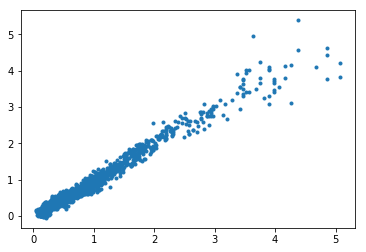

In [200]:
Y_test = model.predict(X_test)

plot(y_test, Y_test,'.')

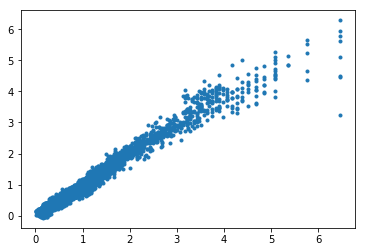

In [201]:
y_train_pred = model.predict(X_train)
plot(y_train,y_train_pred,'.')

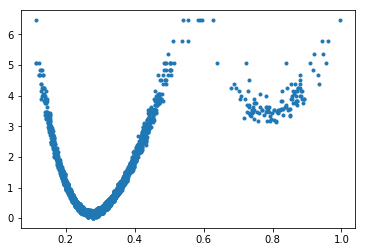

In [203]:
plot(sumabs[:10000],fe[:10000],'.')